# Assignment 2 - version 4 remove outlier by z-score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels as s
from itertools import repeat
import scipy.stats as stats

# Section 0
#### Load and Clean data

In [2]:
AimoScore = pd.read_excel('./AimoScore/AimoScore_WeakLink_big_scores.xls')
data = AimoScore[~AimoScore.isin(['?'])]
data = data.dropna(axis=0)
df = pd.DataFrame(data)
#print(df)

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.5).all(axis=1)
df = df[filtered_entries]

In [3]:
df.describe()

,AimoScore,No_1_Angle_Deviation,No_2_Angle_Deviation,No_3_Angle_Deviation,No_4_Angle_Deviation,No_5_Angle_Deviation,No_6_Angle_Deviation,No_7_Angle_Deviation,No_8_Angle_Deviation,No_9_Angle_Deviation,...,No_19_NASM_Deviation,No_20_NASM_Deviation,No_21_NASM_Deviation,No_22_NASM_Deviation,No_23_NASM_Deviation,No_24_NASM_Deviation,No_25_NASM_Deviation,No_1_Time_Deviation,No_2_Time_Deviation,EstimatedScore
count,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,...,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000
mean,0.588575,0.529287,0.493914,0.552167,0.500962,0.511725,0.484532,0.521912,0.626691,0.506447,...,0.714252,0.704735,0.694018,0.640890,0.698648,0.655830,0.542013,0.506463,0.505577,0.463978
std,0.228043,0.235306,0.278079,0.213819,0.255963,0.269660,0.264885,0.261729,0.148149,0.268831,...,0.081102,0.087139,0.091711,0.129375,0.088927,0.122539,0.228226,0.274981,0.274028,0.276054
min,0.010000,0.279770,0.092300,0.346724,0.188905,0.163080,0.140124,0.194165,0.303247,0.156385,...,0.670971,0.656624,0.640401,0.552846,0.648972,0.578192,0.308943,0.148733,0.151124,0.000478
25%,0.419023,0.279770,0.242468,0.346724,0.239120,0.245337,0.230990,0.254424,0.521760,0.244381,...,0.670971,0.656624,0.642276,0.552846,0.648972,0.578192,0.308943,0.237685,0.236729,0.223816
50%,0.632330,0.486848,0.489240,0.487805,0.479197,0.498804,0.467719,0.506934,0.521760,0.495935,...,0.670971,0.656624,0.642276,0.552846,0.648972,0.578192,0.488761,0.493066,0.489240,0.456241
75%,0.766592,0.728838,0.733142,0.737446,0.721186,0.748446,0.706781,0.751793,0.728838,0.741272,...,0.715925,0.716404,0.713056,0.721664,0.713534,0.714491,0.739837,0.744142,0.744620,0.699187
max,0.993987,0.998565,0.999522,1.000000,1.000000,1.000000,1.000000,1.000000,0.999044,1.000000,...,0.962697,0.966523,0.970827,1.000000,0.967958,0.994739,1.000000,1.000000,1.000000,0.986609


#### Draw Histogram

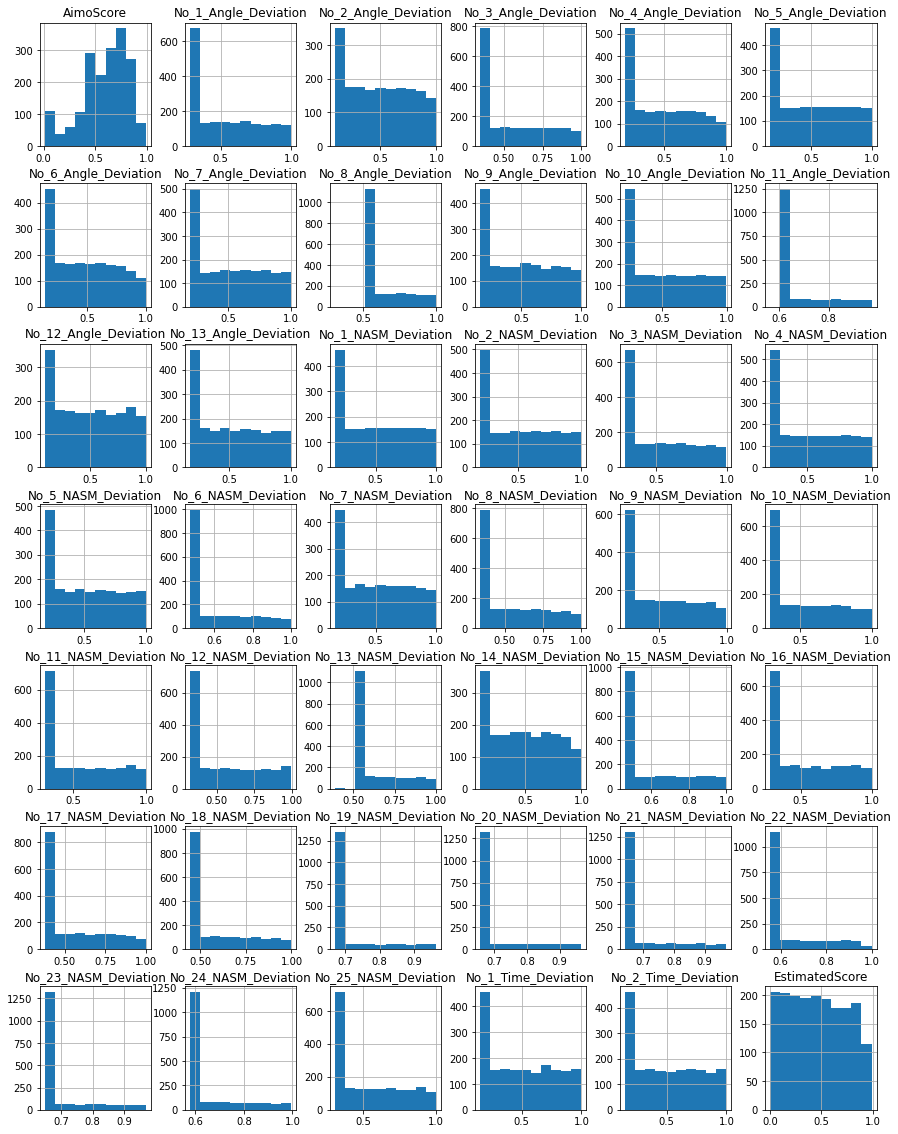

In [4]:
df.hist(figsize = (15, 20))
plt.show()

#### Check correlation using corrMatrix and Heatmap

In [5]:
corrMatrix = df.corr()
corrMatrix['AimoScore']
print (corrMatrix)

                       AimoScore  No_1_Angle_Deviation  No_2_Angle_Deviation  \
AimoScore               1.000000             -0.090554             -0.035325   
No_1_Angle_Deviation   -0.090554              1.000000              0.497763   
No_2_Angle_Deviation   -0.035325              0.497763              1.000000   
No_3_Angle_Deviation   -0.118169              0.146616              0.049509   
No_4_Angle_Deviation   -0.082448              0.251759              0.262945   
No_5_Angle_Deviation   -0.274503             -0.107898             -0.173789   
No_6_Angle_Deviation   -0.266215              0.071748              0.119631   
No_7_Angle_Deviation   -0.224303             -0.154733             -0.202982   
No_8_Angle_Deviation   -0.283562              0.319924              0.358880   
No_9_Angle_Deviation   -0.230242              0.005800             -0.042598   
No_10_Angle_Deviation  -0.384027             -0.144229             -0.236252   
No_11_Angle_Deviation  -0.271594        

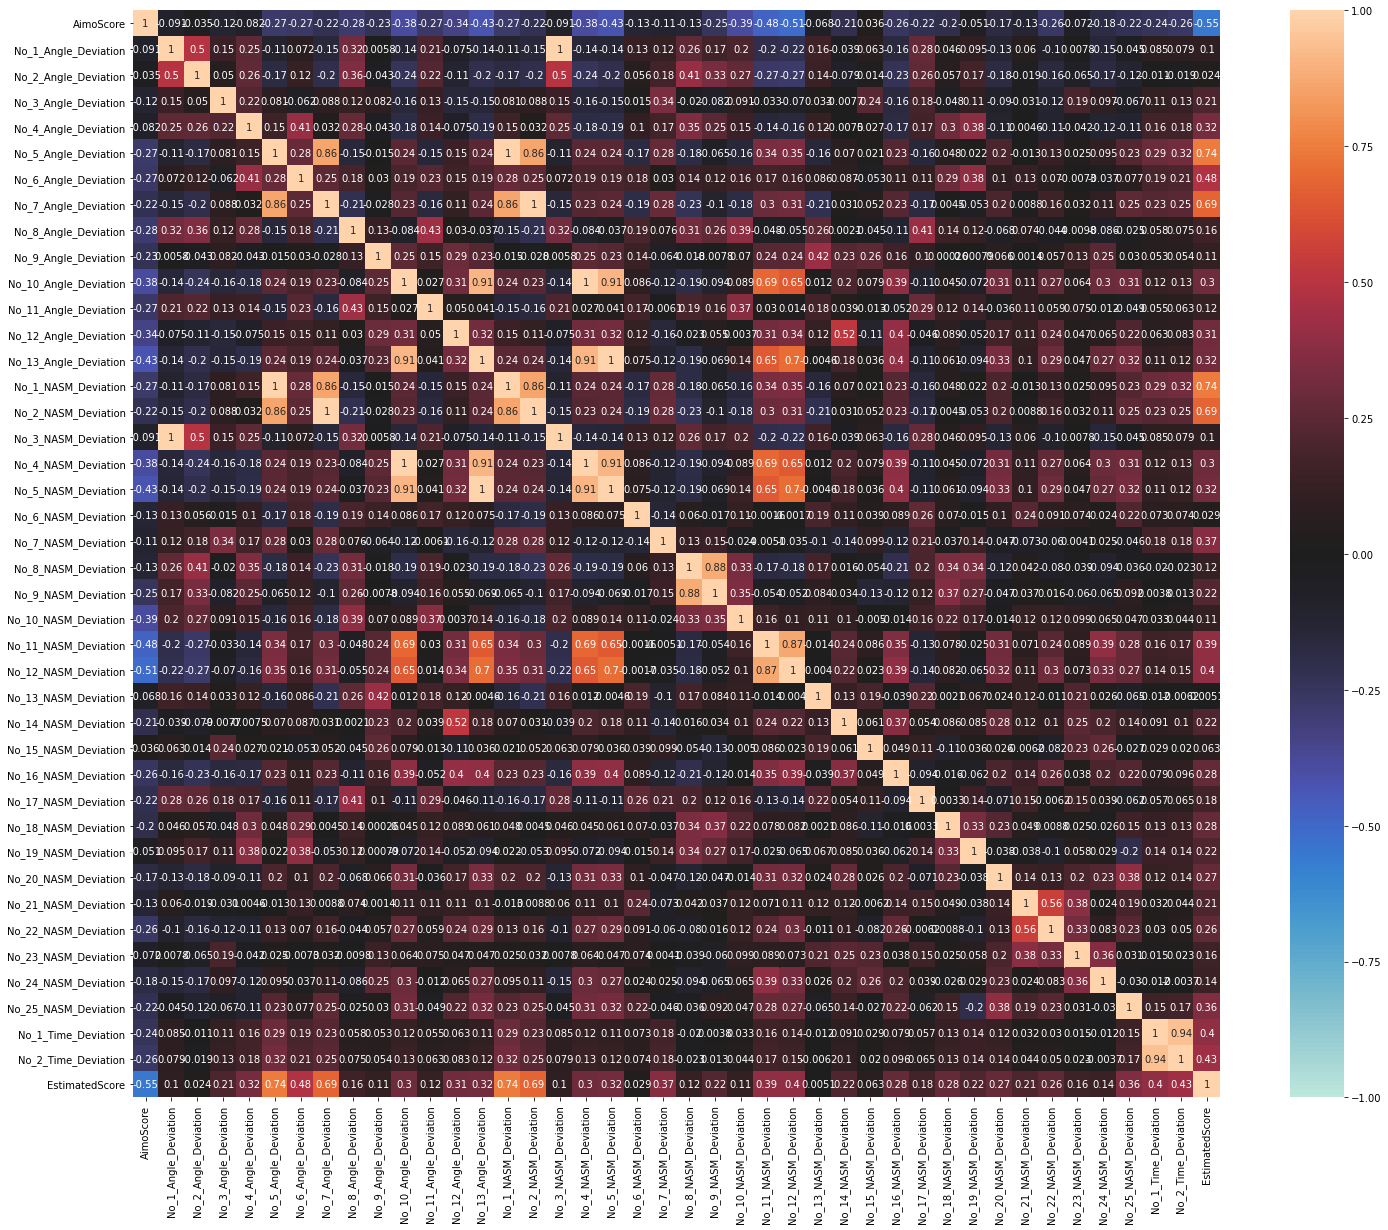

In [6]:
fig, ax = plt.subplots(figsize=(25,20)) 

#sns.heatmap(corrMatrix)

ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True
)

plt.show()

#### Draw pairplots

In [7]:
x = list(df)
x1 = x[1:6]
x2 = x[7:12]
x3 = x[13:18]
x4 = x[19:24]
x5 = x[25:30]
x6 = x[31:36]
x7 = x[37:42]

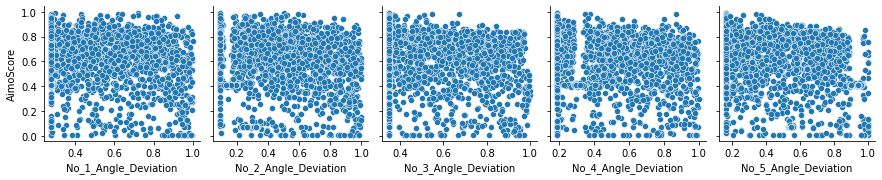

In [8]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x1)

plt.show()

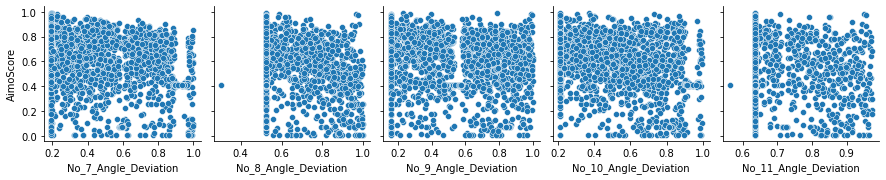

In [9]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x2)

plt.show()

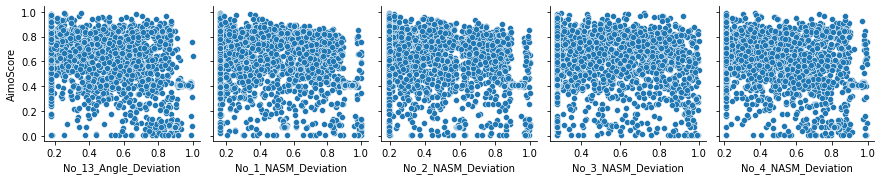

In [10]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x3)

plt.show()

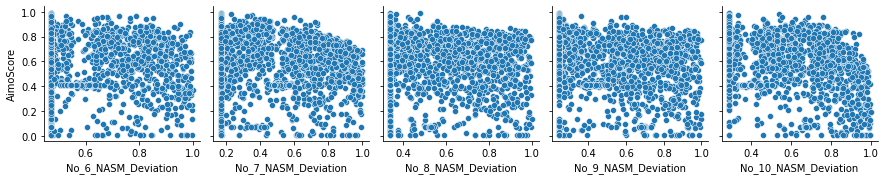

In [11]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x4)

plt.show()

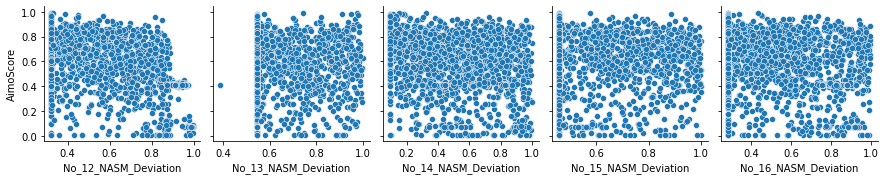

In [12]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x5)

plt.show()

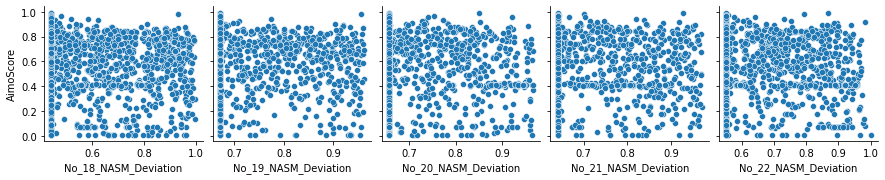

In [13]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x6)

plt.show()

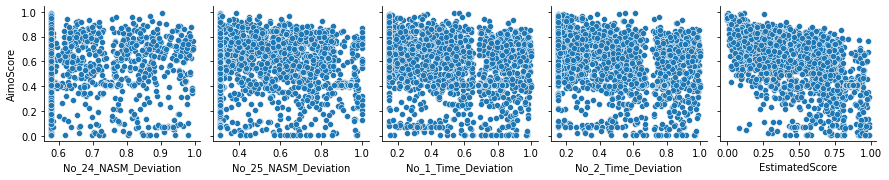

In [14]:
sns.pairplot(data=df,
                  y_vars=['AimoScore'],
                  x_vars=x7)

plt.show()

#### check symmetry and correlation between features as mentioned in slides

In [15]:
combined_dfs = pd.concat([df['No_4_Angle_Deviation'], df['No_6_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_4_Angle_Deviation'].corr(df['No_6_Angle_Deviation']))

combined_dfs = pd.concat([df['No_5_Angle_Deviation'], df['No_7_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference), df['No_5_Angle_Deviation'].corr(df['No_7_Angle_Deviation']))

combined_dfs = pd.concat([df['No_8_Angle_Deviation'], df['No_11_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_8_Angle_Deviation'].corr(df['No_11_Angle_Deviation']))

combined_dfs = pd.concat([df['No_9_Angle_Deviation'], df['No_12_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_9_Angle_Deviation'].corr(df['No_12_Angle_Deviation']))

combined_dfs = pd.concat([df['No_10_Angle_Deviation'], df['No_13_Angle_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_10_Angle_Deviation'].corr(df['No_13_Angle_Deviation']))

combined_dfs = pd.concat([df['No_1_NASM_Deviation'], df['No_2_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_1_NASM_Deviation'].corr(df['No_2_NASM_Deviation']))

combined_dfs = pd.concat([df['No_4_NASM_Deviation'], df['No_5_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_4_NASM_Deviation'].corr(df['No_5_NASM_Deviation']))

combined_dfs = pd.concat([df['No_8_NASM_Deviation'], df['No_9_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_8_NASM_Deviation'].corr(df['No_9_NASM_Deviation']))

combined_dfs = pd.concat([df['No_11_NASM_Deviation'], df['No_12_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_11_NASM_Deviation'].corr(df['No_12_NASM_Deviation']))

combined_dfs = pd.concat([df['No_13_NASM_Deviation'], df['No_14_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_13_NASM_Deviation'].corr(df['No_14_NASM_Deviation']))

combined_dfs = pd.concat([df['No_15_NASM_Deviation'], df['No_16_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_15_NASM_Deviation'].corr(df['No_16_NASM_Deviation']))

combined_dfs = pd.concat([df['No_18_NASM_Deviation'], df['No_19_NASM_Deviation']])
symmetric_difference = combined_dfs.drop_duplicates(keep=False)
print(len(symmetric_difference),df['No_18_NASM_Deviation'].corr(df['No_19_NASM_Deviation']))

544 0.4124678152052533
461 0.8627592997113324
436 0.4333189537856285
583 0.29044799307522773
433 0.9076583483989936
461 0.8627592997113324
433 0.9076583483989936
553 0.8761278739952416
370 0.8723329708682698
1087 0.13250405133094778
615 0.04939920940444161
613 0.32962798610752836


#### prepare dataset

    drop EstimatedScore
    make variables for
        x_ad_all => All Angle_Deviation (13)
        x_ad => Angle_Deviation - symmetry (8)
        x_nd_all => All NASM_Deviation (25)
        x_nd => NASM_Deviation - symmetry (18)
        x_td => Time_Deviation (2)
        
        x_ad_nd_all => All Angle_Deviation and NASM_Deviation (38)
        x_ad_nd => Angle_Deviation and NASM_Deviation - symmetry (26)
        x_ad_nd_td => Angle_Deviation, NASM_Deviation - symmetry And Time deviation (28)
        x => All 40 features (40)
        y => AimoScore

In [16]:
df.drop('EstimatedScore', axis=1, inplace=True)

#x_ad_all = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_6_Angle_Deviation','No_7_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation','No_11_Angle_Deviation','No_12_Angle_Deviation','No_13_Angle_Deviation']]
#x_ad = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation']]
#x_nd_all = df[['No_1_NASM_Deviation','No_2_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_5_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_9_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_12_NASM_Deviation','No_13_NASM_Deviation','No_14_NASM_Deviation','No_15_NASM_Deviation','No_16_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_19_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation']]
#x_nd = df[['No_1_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_13_NASM_Deviation','No_15_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation']]
#x_td = df[['No_1_Time_Deviation','No_2_Time_Deviation']]

#38
x_ad_nd_all = df.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_Deviation']
#26
x_ad_nd = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation','No_1_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_13_NASM_Deviation','No_15_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation']]
#28
x_ad_nd_td = df[['No_1_Angle_Deviation','No_2_Angle_Deviation','No_3_Angle_Deviation','No_4_Angle_Deviation','No_5_Angle_Deviation','No_8_Angle_Deviation','No_9_Angle_Deviation','No_10_Angle_Deviation','No_1_NASM_Deviation','No_3_NASM_Deviation','No_4_NASM_Deviation','No_6_NASM_Deviation','No_7_NASM_Deviation','No_8_NASM_Deviation','No_10_NASM_Deviation','No_11_NASM_Deviation','No_13_NASM_Deviation','No_15_NASM_Deviation','No_17_NASM_Deviation','No_18_NASM_Deviation','No_20_NASM_Deviation','No_21_NASM_Deviation','No_22_NASM_Deviation','No_23_NASM_Deviation','No_24_NASM_Deviation','No_25_NASM_Deviation','No_1_Time_Deviation','No_2_Time_Deviation']]
#40
x = df.loc[:, 'No_1_Angle_Deviation':'No_2_Time_Deviation']

y = df['AimoScore']

# Section 1
Models

1. All 40 features
2. Angle deviation - symmetry, NASM deviation - symmetry, Time deviation (28)
3. All Angle & NASM deviation - symmetry (26)
4. All Angle deviation & NASM deviation (38)

In [17]:
x_temp = sm.add_constant(x)
mlrm_1 = sm.OLS(y, x_temp).fit()
#mlrm_1.summary()

In [18]:
x_temp = sm.add_constant(x_ad_nd_td)
mlrm_2 = sm.OLS(y, x_temp).fit()
#mlrm_2.summary()

In [19]:
x_temp = sm.add_constant(x_ad_nd)
mlrm_3 = sm.OLS(y, x_temp).fit()
#mlrm_3.summary()

In [20]:
x_temp = sm.add_constant(x_ad_nd_all)
mlrm_4 = sm.OLS(y, x_temp).fit()
#mlrm_4.summary()

### Result of Simple Models

In [21]:
print("40 Features Angle + Nasm + Time:",mlrm_1.rsquared_adj,mlrm_1.pvalues.loc['const'])
print("28 Features Angle + NASM - symmetry + Time:",mlrm_2.rsquared_adj,mlrm_2.pvalues.loc['const'])
print("26 Features Angle + NASM - symmetry - Time:",mlrm_3.rsquared_adj,mlrm_3.pvalues.loc['const'])
print("38 Fetures Angle + NASM :",mlrm_4.rsquared_adj,mlrm_4.pvalues.loc['const'])

40 Features Angle + Nasm + Time: 0.5698900076753396 1.0391359740558867e-97
28 Features Angle + NASM - symmetry + Time: 0.5101641181350395 1.6595207089680766e-146
26 Features Angle + NASM - symmetry - Time: 0.5050429417730189 8.015815930905507e-147
38 Fetures Angle + NASM : 0.5642426114976461 3.7401190714578806e-99


## Finding Setion 1

all 40 features is good candidate for Model

# Section 2

    find all interaction term where pvalue < 0.05 in each 4 sets
    make model for each 4 sets

In [22]:
#40 Features Angle + Nasm + Time

df_modify_40 = x.copy()
df_temp = x.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_40[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_1_Angle_Deviation 0.009660933361670255 0.5712405206479785
--------
No_1_Angle_Deviation No_2_Angle_Deviation 0.004327756842462253 0.5715822885077672
--------
No_1_Angle_Deviation No_4_Angle_Deviation 0.0005416316642982107 0.572486101051523
--------
No_1_Angle_Deviation No_6_Angle_Deviation 2.046139372542563e-06 0.5749767912231685
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.00016741807399615996 0.5730047146033508
--------
No_1_Angle_Deviation No_10_Angle_Deviation 0.0015187882266735268 0.5720348905401743
--------
No_1_Angle_Deviation No_12_Angle_Deviation 0.012205729096986377 0.5711421340527925
--------
No_1_Angle_Deviation No_13_Angle_Deviation 0.00022479762743105104 0.572874137907302
--------
No_1_Angle_Deviation No_3_NASM_Deviation 0.009660933361670255 0.5712405206479785
--------
No_1_Angle_Deviation No_4_NASM_Deviation 0.0015187882266735268 0.5720348905401743
--------
No_1_Angle_Deviation No_5_NASM_Deviation 0.00022479762743105104 0.572874137907302
-

No_6_Angle_Deviation No_3_NASM_Deviation 2.046139372542563e-06 0.5749767912231685
--------
No_6_Angle_Deviation No_6_NASM_Deviation 0.01845705573141955 0.5709696334555783
--------
No_6_Angle_Deviation No_9_NASM_Deviation 0.0004909510515114077 0.572529320266876
--------
No_6_Angle_Deviation No_11_NASM_Deviation 0.039819773815479347 0.5706553084978481
--------
No_6_Angle_Deviation No_12_NASM_Deviation 0.008892809611947786 0.5712755151662428
--------
No_6_Angle_Deviation No_13_NASM_Deviation 0.03320964204610046 0.5707286313019109
--------
No_6_Angle_Deviation No_17_NASM_Deviation 0.006917519156448556 0.571382010469011
--------
No_6_Angle_Deviation No_20_NASM_Deviation 0.031008349820718237 0.5707564889348098
--------
No_6_Angle_Deviation No_21_NASM_Deviation 0.013483190216564534 0.5711004284410665
--------
No_6_Angle_Deviation No_22_NASM_Deviation 0.038596530592356064 0.5706678676831916
--------
No_6_Angle_Deviation No_23_NASM_Deviation 0.002212598997839231 0.5718715066744678
--------
No_6

No_11_Angle_Deviation No_10_Angle_Deviation 0.0015871340940043352 0.5720157376007491
--------
No_11_Angle_Deviation No_12_Angle_Deviation 0.007203743677087777 0.571364782534376
--------
No_11_Angle_Deviation No_13_Angle_Deviation 0.0006289619721818275 0.5724204082011428
--------
No_11_Angle_Deviation No_1_NASM_Deviation 0.004947480802930993 0.5715249637406992
--------
No_11_Angle_Deviation No_2_NASM_Deviation 0.0010127595984315819 0.5722116653295797
--------
No_11_Angle_Deviation No_4_NASM_Deviation 0.0015871340940043352 0.5720157376007491
--------
No_11_Angle_Deviation No_5_NASM_Deviation 0.0006289619721818275 0.5724204082011428
--------
No_11_Angle_Deviation No_10_NASM_Deviation 0.00046404297649011204 0.5725541336388036
--------
No_11_Angle_Deviation No_11_NASM_Deviation 2.75501846547119e-06 0.5748427539137833
--------
No_11_Angle_Deviation No_12_NASM_Deviation 6.791490755845249e-07 0.5754744158047526
--------
No_11_Angle_Deviation No_15_NASM_Deviation 0.001379416707929864 0.57207680

No_3_NASM_Deviation No_4_Angle_Deviation 0.0005416316642982107 0.572486101051523
--------
No_3_NASM_Deviation No_6_Angle_Deviation 2.046139372542563e-06 0.5749767912231685
--------
No_3_NASM_Deviation No_8_Angle_Deviation 0.00016741807399615996 0.5730047146033508
--------
No_3_NASM_Deviation No_10_Angle_Deviation 0.0015187882266735268 0.5720348905401743
--------
No_3_NASM_Deviation No_12_Angle_Deviation 0.012205729096986377 0.5711421340527925
--------
No_3_NASM_Deviation No_13_Angle_Deviation 0.00022479762743105104 0.572874137907302
--------
No_3_NASM_Deviation No_3_NASM_Deviation 0.009660933361670255 0.5712405206479785
--------
No_3_NASM_Deviation No_4_NASM_Deviation 0.0015187882266735268 0.5720348905401743
--------
No_3_NASM_Deviation No_5_NASM_Deviation 0.00022479762743105104 0.572874137907302
--------
No_3_NASM_Deviation No_6_NASM_Deviation 0.023044735122229473 0.570877941720027
--------
No_3_NASM_Deviation No_7_NASM_Deviation 0.0014530426605524763 0.5720541561032679
--------
No_3_

--------
No_7_NASM_Deviation No_1_Angle_Deviation 0.0014530426605524763 0.5720541561032679
--------
No_7_NASM_Deviation No_2_Angle_Deviation 0.004875481027837867 0.5715312365667005
--------
No_7_NASM_Deviation No_5_Angle_Deviation 0.000485408862029734 0.5725343169848774
--------
No_7_NASM_Deviation No_7_Angle_Deviation 0.014823982560115911 0.5710608126591508
--------
No_7_NASM_Deviation No_8_Angle_Deviation 0.040056986764167545 0.5706529198585062
--------
No_7_NASM_Deviation No_9_Angle_Deviation 0.013584334405477343 0.5710973016378166
--------
No_7_NASM_Deviation No_10_Angle_Deviation 4.461386909890166e-07 0.5756642634856236
--------
No_7_NASM_Deviation No_12_Angle_Deviation 0.0004654426754635707 0.5725528075406583
--------
No_7_NASM_Deviation No_13_Angle_Deviation 6.4258819143087674e-09 0.5775848331675151
--------
No_7_NASM_Deviation No_1_NASM_Deviation 0.000485408862029734 0.5725343169848774
--------
No_7_NASM_Deviation No_2_NASM_Deviation 0.014823982560115911 0.5710608126591508
----

No_11_NASM_Deviation No_16_NASM_Deviation 5.0264701277306966e-14 0.5829183641280822
--------
No_11_NASM_Deviation No_17_NASM_Deviation 1.6830377549529784e-14 0.5834135899562363
--------
No_11_NASM_Deviation No_18_NASM_Deviation 0.02356981189768005 0.5708686752808527
--------
No_11_NASM_Deviation No_19_NASM_Deviation 0.0013059631978980448 0.5721006564466865
--------
No_11_NASM_Deviation No_20_NASM_Deviation 0.032523730282274115 0.5707370998211481
--------
No_11_NASM_Deviation No_22_NASM_Deviation 4.0649117746107864e-07 0.5757063267075705
--------
No_11_NASM_Deviation No_23_NASM_Deviation 0.0013683791444272983 0.5720803071124008
--------
No_11_NASM_Deviation No_24_NASM_Deviation 2.2953035675014103e-08 0.5770075176804199
--------
No_11_NASM_Deviation No_25_NASM_Deviation 0.011133344564015143 0.5711807616193674
--------
No_11_NASM_Deviation No_1_Time_Deviation 2.945451797650505e-05 0.573778865907634
--------
No_11_NASM_Deviation No_2_Time_Deviation 9.931973466914335e-05 0.5732366312380088


No_17_NASM_Deviation No_1_Angle_Deviation 3.786061485486081e-06 0.5746996080022432
--------
No_17_NASM_Deviation No_2_Angle_Deviation 0.00013711518417022848 0.5730933189680554
--------
No_17_NASM_Deviation No_5_Angle_Deviation 0.00047163320782828925 0.5725469903365246
--------
No_17_NASM_Deviation No_6_Angle_Deviation 0.006917519156448556 0.571382010469011
--------
No_17_NASM_Deviation No_7_Angle_Deviation 0.013747945500599728 0.5710922940105894
--------
No_17_NASM_Deviation No_8_Angle_Deviation 4.448947760669294e-05 0.5735945603673902
--------
No_17_NASM_Deviation No_10_Angle_Deviation 9.75687779132046e-07 0.5753108329395027
--------
No_17_NASM_Deviation No_12_Angle_Deviation 0.016891547956006163 0.5710064286762031
--------
No_17_NASM_Deviation No_13_Angle_Deviation 2.4144066635120368e-06 0.5749022082062385
--------
No_17_NASM_Deviation No_1_NASM_Deviation 0.00047163320782828925 0.5725469903365246
--------
No_17_NASM_Deviation No_2_NASM_Deviation 0.013747945500599728 0.571092294010589

No_23_NASM_Deviation No_3_Angle_Deviation 0.04150346290719189 0.570638668074972
--------
No_23_NASM_Deviation No_6_Angle_Deviation 0.002212598997839231 0.5718715066744678
--------
No_23_NASM_Deviation No_11_Angle_Deviation 0.0018311276756868271 0.5719535838618636
--------
No_23_NASM_Deviation No_7_NASM_Deviation 0.011694063891805091 0.5711601107043546
--------
No_23_NASM_Deviation No_11_NASM_Deviation 0.0013683791444272983 0.5720803071124008
--------
No_23_NASM_Deviation No_12_NASM_Deviation 0.00020383970235476832 0.5729174728594475
--------
No_23_NASM_Deviation No_20_NASM_Deviation 9.452890658843892e-05 0.573258624509547
--------
No_24_NASM_Deviation No_1_Angle_Deviation 0.003117127898030799 0.5717233842369217
--------
No_24_NASM_Deviation No_2_Angle_Deviation 0.0013692833445583974 0.5720800192655293
--------
No_24_NASM_Deviation No_3_Angle_Deviation 3.9905572390966105e-08 0.5767568614957757
--------
No_24_NASM_Deviation No_4_Angle_Deviation 2.6344711807199877e-09 0.5779893650721754
-

In [23]:
#28 Features Angle + NASM - symmetry + Time

df_modify_28 = x_ad_nd_td.copy()
df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_28[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_1_Angle_Deviation 0.0014642112573969846 0.5126115100422901
--------
No_1_Angle_Deviation No_2_Angle_Deviation 0.000245893278177937 0.5134990780287715
--------
No_1_Angle_Deviation No_3_Angle_Deviation 0.00025090290896977196 0.5134889728723044
--------
No_1_Angle_Deviation No_4_Angle_Deviation 4.1437773430931133e-05 0.514395973034218
--------
No_1_Angle_Deviation No_5_Angle_Deviation 0.023361914082674472 0.5112766988242212
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.00022153219902032713 0.5135513730644987
--------
No_1_Angle_Deviation No_9_Angle_Deviation 0.0433373286397249 0.5109924251121916
--------
No_1_Angle_Deviation No_10_Angle_Deviation 6.4786487028798216e-06 0.5153379918881346
--------
No_1_Angle_Deviation No_1_NASM_Deviation 0.023361914082674472 0.5112766988242212
--------
No_1_Angle_Deviation No_3_NASM_Deviation 0.0014642112573969846 0.5126115100422901
--------
No_1_Angle_Deviation No_4_NASM_Deviation 6.4786487028798216e-06 0.5153379918881346
-

No_8_Angle_Deviation No_3_Angle_Deviation 2.4731278501601202e-15 0.5264648330449003
--------
No_8_Angle_Deviation No_9_Angle_Deviation 2.4365255616727686e-05 0.5146649194637167
--------
No_8_Angle_Deviation No_3_NASM_Deviation 0.00022153219902032713 0.5135513730644987
--------
No_8_Angle_Deviation No_15_NASM_Deviation 0.002161367581307748 0.5124199066365559
--------
No_8_Angle_Deviation No_17_NASM_Deviation 7.578889320278731e-05 0.5140909381392631
--------
No_8_Angle_Deviation No_21_NASM_Deviation 0.013923645673008484 0.5115198346640282
--------
No_8_Angle_Deviation No_22_NASM_Deviation 0.0006673899007041151 0.513000627965255
--------
No_8_Angle_Deviation No_25_NASM_Deviation 0.00450914507873859 0.5120608958156474
--------
No_8_Angle_Deviation No_1_Time_Deviation 0.012696796284826237 0.5115635652593327
--------
No_8_Angle_Deviation No_2_Time_Deviation 0.007336615342729565 0.511825686288438
--------
No_9_Angle_Deviation No_1_Angle_Deviation 0.0433373286397249 0.5109924251121916
--------

No_4_NASM_Deviation No_4_NASM_Deviation 0.0012720832587736037 0.5126809366001462
--------
No_4_NASM_Deviation No_6_NASM_Deviation 5.138316909475651e-09 0.5189946797249294
--------
No_4_NASM_Deviation No_7_NASM_Deviation 1.6683291651825169e-09 0.5195728372032129
--------
No_4_NASM_Deviation No_8_NASM_Deviation 0.04220499282178704 0.5110044439809275
--------
No_4_NASM_Deviation No_10_NASM_Deviation 4.783795929101188e-06 0.5154924637495364
--------
No_4_NASM_Deviation No_11_NASM_Deviation 3.658072923103645e-15 0.5262643819852686
--------
No_4_NASM_Deviation No_13_NASM_Deviation 0.006128333897075834 0.5119123853174847
--------
No_4_NASM_Deviation No_15_NASM_Deviation 0.005346509511101802 0.511978342960378
--------
No_4_NASM_Deviation No_17_NASM_Deviation 1.4426334901031562e-11 0.5220151610183008
--------
No_4_NASM_Deviation No_18_NASM_Deviation 0.002263386554791334 0.5123972771305424
--------
No_4_NASM_Deviation No_22_NASM_Deviation 7.585933940385114e-06 0.5152576759674927
--------
No_4_NA

No_13_NASM_Deviation No_10_Angle_Deviation 0.006128333897075834 0.5119123853174847
--------
No_13_NASM_Deviation No_1_NASM_Deviation 0.037733771811423525 0.5110554531877594
--------
No_13_NASM_Deviation No_3_NASM_Deviation 0.0015880971785254333 0.5125714732091229
--------
No_13_NASM_Deviation No_4_NASM_Deviation 0.006128333897075834 0.5119123853174847
--------
No_13_NASM_Deviation No_6_NASM_Deviation 1.0922491408957412e-06 0.5162463181324647
--------
No_13_NASM_Deviation No_11_NASM_Deviation 3.0116884335443186e-05 0.5145575190957214
--------
No_13_NASM_Deviation No_20_NASM_Deviation 0.011093533639705848 0.5116277559810709
--------
No_13_NASM_Deviation No_24_NASM_Deviation 0.0005603852264668272 0.5130875751438242
--------
No_15_NASM_Deviation No_2_Angle_Deviation 0.0034711807243950617 0.5121881545217386
--------
No_15_NASM_Deviation No_3_Angle_Deviation 0.006082121530989083 0.5119160389269053
--------
No_15_NASM_Deviation No_4_Angle_Deviation 0.0034572984649329217 0.5121901080246849
---

No_23_NASM_Deviation No_11_NASM_Deviation 0.014552146094687095 0.5114989424875814
--------
No_23_NASM_Deviation No_20_NASM_Deviation 0.0021434562904236493 0.5124239911215325
--------
No_23_NASM_Deviation No_22_NASM_Deviation 0.026091534770762138 0.5112253287986108
--------
No_23_NASM_Deviation No_25_NASM_Deviation 0.022193461929444054 0.5113006212381195
--------
No_24_NASM_Deviation No_1_Angle_Deviation 2.8758242901265147e-05 0.5145809052772268
--------
No_24_NASM_Deviation No_2_Angle_Deviation 5.426623401244363e-05 0.5142596045543282
--------
No_24_NASM_Deviation No_3_Angle_Deviation 6.727540989183426e-14 0.5247718852808904
--------
No_24_NASM_Deviation No_4_Angle_Deviation 1.7245336422892794e-12 0.5231066409781933
--------
No_24_NASM_Deviation No_9_Angle_Deviation 0.04999400760336619 0.5109278457812554
--------
No_24_NASM_Deviation No_10_Angle_Deviation 0.0021857119872985137 0.512414409793257
--------
No_24_NASM_Deviation No_3_NASM_Deviation 2.8758242901265147e-05 0.5145809052772268


In [24]:
#26 Features Angle + NASM - symmetry - Time

df_modify_26 = x_ad_nd.copy()
df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_26[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_1_Angle_Deviation 0.000938557800599581 0.507735141318606
--------
No_1_Angle_Deviation No_2_Angle_Deviation 3.698561118877605e-05 0.5093724259536446
--------
No_1_Angle_Deviation No_3_Angle_Deviation 0.0001472611347976008 0.5086688132611012
--------
No_1_Angle_Deviation No_4_Angle_Deviation 9.791601882641872e-05 0.5088761231276582
--------
No_1_Angle_Deviation No_5_Angle_Deviation 0.008500132282559789 0.5066487038244583
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.00011761297076465028 0.5087829554639522
--------
No_1_Angle_Deviation No_10_Angle_Deviation 7.376272514504016e-06 0.5101985339439996
--------
No_1_Angle_Deviation No_1_NASM_Deviation 0.008500132282559789 0.5066487038244583
--------
No_1_Angle_Deviation No_3_NASM_Deviation 0.000938557800599581 0.507735141318606
--------
No_1_Angle_Deviation No_4_NASM_Deviation 7.376272514504016e-06 0.5101985339439996
--------
No_1_Angle_Deviation No_6_NASM_Deviation 0.0005903325553047481 0.5079675730498798
-----

No_8_Angle_Deviation No_21_NASM_Deviation 0.005115598352381467 0.50689569955646
--------
No_8_Angle_Deviation No_22_NASM_Deviation 0.0012983388366929775 0.5075731062191371
--------
No_8_Angle_Deviation No_25_NASM_Deviation 0.0026419951919075544 0.5072204829152134
--------
No_9_Angle_Deviation No_2_Angle_Deviation 0.025987882710641265 0.5061159363105796
--------
No_9_Angle_Deviation No_3_Angle_Deviation 1.5913506209066634e-06 0.510987926415825
--------
No_9_Angle_Deviation No_4_Angle_Deviation 0.004014419551273808 0.50701444353504
--------
No_9_Angle_Deviation No_8_Angle_Deviation 4.6693646111283896e-05 0.5092534074612551
--------
No_9_Angle_Deviation No_10_Angle_Deviation 0.005920029325386379 0.5068244051143044
--------
No_9_Angle_Deviation No_4_NASM_Deviation 0.005920029325386379 0.5068244051143044
--------
No_9_Angle_Deviation No_6_NASM_Deviation 0.0015898030396435375 0.507472269982881
--------
No_9_Angle_Deviation No_7_NASM_Deviation 0.00024513758236442777 0.5084106414610732
-------

No_4_NASM_Deviation No_22_NASM_Deviation 2.836156888558229e-06 0.5106901666718626
--------
No_4_NASM_Deviation No_24_NASM_Deviation 0.0028322452555361965 0.5071861471088489
--------
No_6_NASM_Deviation No_1_Angle_Deviation 0.0005903325553047481 0.5079675730498798
--------
No_6_NASM_Deviation No_2_Angle_Deviation 0.004828659274364931 0.5069239316686016
--------
No_6_NASM_Deviation No_4_Angle_Deviation 0.00789783745904484 0.5066842919881116
--------
No_6_NASM_Deviation No_5_Angle_Deviation 0.0010008994287359616 0.5077029848609036
--------
No_6_NASM_Deviation No_8_Angle_Deviation 0.020443915924960292 0.5062288004164079
--------
No_6_NASM_Deviation No_9_Angle_Deviation 0.0015898030396435375 0.507472269982881
--------
No_6_NASM_Deviation No_10_Angle_Deviation 1.0574907610908543e-08 0.5135818280560142
--------
No_6_NASM_Deviation No_1_NASM_Deviation 0.0010008994287359616 0.5077029848609036
--------
No_6_NASM_Deviation No_3_NASM_Deviation 0.0005903325553047481 0.5079675730498798
--------
No_6

No_15_NASM_Deviation No_4_Angle_Deviation 0.002284875253967561 0.5072923008003416
--------
No_15_NASM_Deviation No_8_Angle_Deviation 0.0005976992908119874 0.507961343217042
--------
No_15_NASM_Deviation No_10_Angle_Deviation 0.0011003284344179268 0.5076556664912059
--------
No_15_NASM_Deviation No_4_NASM_Deviation 0.0011003284344179268 0.5076556664912059
--------
No_15_NASM_Deviation No_7_NASM_Deviation 0.03698699894633479 0.5059518278176327
--------
No_15_NASM_Deviation No_10_NASM_Deviation 0.0030202720837481808 0.5071544386197406
--------
No_15_NASM_Deviation No_11_NASM_Deviation 6.193052944688726e-05 0.5091093649634189
--------
No_15_NASM_Deviation No_17_NASM_Deviation 0.04047159774466562 0.5059103713818636
--------
No_15_NASM_Deviation No_24_NASM_Deviation 7.529768356365791e-08 0.5125646660761718
--------
No_17_NASM_Deviation No_1_Angle_Deviation 2.122999369501337e-09 0.5144146555794155
--------
No_17_NASM_Deviation No_2_Angle_Deviation 1.4965426603321713e-06 0.5110195981072032
---

No_24_NASM_Deviation No_10_NASM_Deviation 2.56801943090494e-08 0.5131219092361161
--------
No_24_NASM_Deviation No_11_NASM_Deviation 0.0036511628202336864 0.5070610379826508
--------
No_24_NASM_Deviation No_13_NASM_Deviation 0.0015546937665154791 0.507483377138072
--------
No_24_NASM_Deviation No_15_NASM_Deviation 7.529768356365791e-08 0.5125646660761718
--------
No_24_NASM_Deviation No_17_NASM_Deviation 2.1270969555566127e-09 0.5144136551559835
--------
No_24_NASM_Deviation No_18_NASM_Deviation 0.00012563846211193473 0.5087494253812587
--------
No_24_NASM_Deviation No_22_NASM_Deviation 9.763211951599922e-15 0.5207863686554729
--------
No_24_NASM_Deviation No_25_NASM_Deviation 0.00015684698849136993 0.5086368208043908
--------
No_25_NASM_Deviation No_2_Angle_Deviation 0.01872207332532077 0.5062704193902505
--------
No_25_NASM_Deviation No_4_Angle_Deviation 8.003873668033287e-05 0.5089787024043422
--------
No_25_NASM_Deviation No_8_Angle_Deviation 0.0026419951919075544 0.507220482915213

In [25]:
#38 Fetures Angle + NASM

df_modify_38 = x_ad_nd_all.copy()
df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.pvalues.loc['rand'] < 0.05:
            if i == "rand":
                pass
            elif j == "rand":
                pass
            else:
                print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.rsquared_adj)
                df_modify_38[i+j] = df_temp[i] * df_temp[j]
                print("--------")

No_1_Angle_Deviation No_1_Angle_Deviation 0.005344787517931244 0.5658637898673604
--------
No_1_Angle_Deviation No_2_Angle_Deviation 0.0007027707982739434 0.5667541253886398
--------
No_1_Angle_Deviation No_3_Angle_Deviation 0.04306871640118627 0.5649852413425396
--------
No_1_Angle_Deviation No_4_Angle_Deviation 0.000862251180219355 0.5666634056801918
--------
No_1_Angle_Deviation No_6_Angle_Deviation 3.0682910134790135e-06 0.5692057969219578
--------
No_1_Angle_Deviation No_8_Angle_Deviation 0.00010340941162598602 0.5676112894746042
--------
No_1_Angle_Deviation No_10_Angle_Deviation 0.001244409203813807 0.5665011308379764
--------
No_1_Angle_Deviation No_12_Angle_Deviation 0.00826128113222084 0.565676310544746
--------
No_1_Angle_Deviation No_13_Angle_Deviation 0.0002416643350163062 0.5672301981080885
--------
No_1_Angle_Deviation No_3_NASM_Deviation 0.005344787517931244 0.5658637898673604
--------
No_1_Angle_Deviation No_4_NASM_Deviation 0.001244409203813807 0.5665011308379764
----

No_5_Angle_Deviation No_21_NASM_Deviation 0.0118964253829464 0.5655206830213346
--------
No_6_Angle_Deviation No_1_Angle_Deviation 3.0682910134790135e-06 0.5692057969219578
--------
No_6_Angle_Deviation No_3_Angle_Deviation 0.00033807785213254497 0.5670800489559307
--------
No_6_Angle_Deviation No_8_Angle_Deviation 0.004460284664103587 0.5659421376930293
--------
No_6_Angle_Deviation No_3_NASM_Deviation 3.0682910134790135e-06 0.5692057969219578
--------
No_6_Angle_Deviation No_6_NASM_Deviation 0.010773984043310088 0.5655628424510709
--------
No_6_Angle_Deviation No_8_NASM_Deviation 0.044354306905177124 0.5649733241329151
--------
No_6_Angle_Deviation No_9_NASM_Deviation 0.0003930801669998197 0.567012752983731
--------
No_6_Angle_Deviation No_11_NASM_Deviation 0.04552687117602011 0.5649627672291876
--------
No_6_Angle_Deviation No_12_NASM_Deviation 0.012577402287391766 0.5654970503119983
--------
No_6_Angle_Deviation No_13_NASM_Deviation 0.0374397891011873 0.565042229839195
--------
No_

No_10_Angle_Deviation No_17_NASM_Deviation 1.337609257055437e-06 0.5695845161894793
--------
No_10_Angle_Deviation No_18_NASM_Deviation 0.01951653444526965 0.565311812047236
--------
No_10_Angle_Deviation No_22_NASM_Deviation 0.002937114020517077 0.5661239795804949
--------
No_10_Angle_Deviation No_24_NASM_Deviation 9.760207491358301e-06 0.5686791667074673
--------
No_10_Angle_Deviation No_25_NASM_Deviation 0.025809480590298493 0.5651953300499417
--------
No_11_Angle_Deviation No_2_Angle_Deviation 0.04144031383032423 0.5650008845717768
--------
No_11_Angle_Deviation No_3_Angle_Deviation 0.0006046571025209288 0.5668209360471289
--------
No_11_Angle_Deviation No_5_Angle_Deviation 0.017486964907396554 0.5653578788577079
--------
No_11_Angle_Deviation No_7_Angle_Deviation 0.0031871016865604976 0.5660883325709662
--------
No_11_Angle_Deviation No_10_Angle_Deviation 0.001159871066028793 0.566532200781608
--------
No_11_Angle_Deviation No_12_Angle_Deviation 0.008740530206176546 0.565652157068

No_2_NASM_Deviation No_17_NASM_Deviation 0.0070727779868321695 0.5657429933750735
--------
No_2_NASM_Deviation No_21_NASM_Deviation 0.0067854502101727665 0.5657608347493729
--------
No_2_NASM_Deviation No_25_NASM_Deviation 0.0299744745397441 0.5651334719394683
--------
No_3_NASM_Deviation No_1_Angle_Deviation 0.005344787517931244 0.5658637898673604
--------
No_3_NASM_Deviation No_2_Angle_Deviation 0.0007027707982739434 0.5667541253886398
--------
No_3_NASM_Deviation No_3_Angle_Deviation 0.04306871640118627 0.5649852413425396
--------
No_3_NASM_Deviation No_4_Angle_Deviation 0.000862251180219355 0.5666634056801918
--------
No_3_NASM_Deviation No_6_Angle_Deviation 3.0682910134790135e-06 0.5692057969219578
--------
No_3_NASM_Deviation No_8_Angle_Deviation 0.00010340941162598602 0.5676112894746042
--------
No_3_NASM_Deviation No_10_Angle_Deviation 0.001244409203813807 0.5665011308379764
--------
No_3_NASM_Deviation No_12_Angle_Deviation 0.00826128113222084 0.565676310544746
--------
No_3_N

No_6_NASM_Deviation No_11_NASM_Deviation 5.669270859613471e-06 0.5689261980669789
--------
No_6_NASM_Deviation No_12_NASM_Deviation 4.0354328109993413e-07 0.5701321741786607
--------
No_6_NASM_Deviation No_13_NASM_Deviation 0.00016120888052522018 0.5674117113073809
--------
No_6_NASM_Deviation No_16_NASM_Deviation 0.001023626621927437 0.5665874438077123
--------
No_6_NASM_Deviation No_17_NASM_Deviation 1.4053638931198742e-07 0.5706150158047587
--------
No_6_NASM_Deviation No_21_NASM_Deviation 0.006672651237815993 0.5657680505660025
--------
No_6_NASM_Deviation No_22_NASM_Deviation 0.0014808221933262603 0.5664244184989027
--------
No_6_NASM_Deviation No_24_NASM_Deviation 3.464415823709628e-08 0.571256856322476
--------
No_7_NASM_Deviation No_1_Angle_Deviation 0.002953149188997722 0.5661216021931128
--------
No_7_NASM_Deviation No_2_Angle_Deviation 0.018831156042163736 0.5653267921142234
--------
No_7_NASM_Deviation No_5_Angle_Deviation 0.0014747588070048061 0.5664262263242266
--------
N

No_11_NASM_Deviation No_16_NASM_Deviation 5.29313005244183e-14 0.577404011204808
--------
No_11_NASM_Deviation No_17_NASM_Deviation 1.1479091751749802e-14 0.5781041057824876
--------
No_11_NASM_Deviation No_18_NASM_Deviation 0.028436935668241674 0.5651552028021021
--------
No_11_NASM_Deviation No_19_NASM_Deviation 0.0010672950823853594 0.5665689668770795
--------
No_11_NASM_Deviation No_20_NASM_Deviation 0.02977501862928066 0.5651362246245809
--------
No_11_NASM_Deviation No_22_NASM_Deviation 1.375376094951384e-07 0.5706248953398643
--------
No_11_NASM_Deviation No_23_NASM_Deviation 0.001781767999999963 0.5663429934088553
--------
No_11_NASM_Deviation No_24_NASM_Deviation 3.2765835242261105e-08 0.5712824216372749
--------
No_11_NASM_Deviation No_25_NASM_Deviation 0.019218337808440494 0.5653182617823185
--------
No_12_NASM_Deviation No_1_Angle_Deviation 7.4088350940147915e-06 0.5688044604718827
--------
No_12_NASM_Deviation No_2_Angle_Deviation 3.6056906902662883e-14 0.5775799045181799


No_17_NASM_Deviation No_12_Angle_Deviation 0.016756084110643825 0.5653758332233898
--------
No_17_NASM_Deviation No_13_Angle_Deviation 5.883871763910516e-06 0.568909291148742
--------
No_17_NASM_Deviation No_1_NASM_Deviation 0.0001906874647356062 0.5673363613321059
--------
No_17_NASM_Deviation No_2_NASM_Deviation 0.0070727779868321695 0.5657429933750735
--------
No_17_NASM_Deviation No_3_NASM_Deviation 1.1423990278163433e-06 0.5696565472550827
--------
No_17_NASM_Deviation No_4_NASM_Deviation 1.337609257055437e-06 0.5695845161894793
--------
No_17_NASM_Deviation No_5_NASM_Deviation 5.883871763910516e-06 0.568909291148742
--------
No_17_NASM_Deviation No_6_NASM_Deviation 1.4053638931198742e-07 0.5706150158047587
--------
No_17_NASM_Deviation No_7_NASM_Deviation 0.0004612540163333473 0.5669414364357857
--------
No_17_NASM_Deviation No_11_NASM_Deviation 1.1479091751749802e-14 0.5781041057824876
--------
No_17_NASM_Deviation No_12_NASM_Deviation 2.216630068635554e-18 0.5820088238468177
--

No_23_NASM_Deviation No_20_NASM_Deviation 0.0002091857280166041 0.5672948529170914
--------
No_24_NASM_Deviation No_1_Angle_Deviation 0.0032120950022592135 0.5660849259647989
--------
No_24_NASM_Deviation No_2_Angle_Deviation 0.0012160937566325942 0.5665112933408998
--------
No_24_NASM_Deviation No_3_Angle_Deviation 8.171547684591718e-09 0.5719196308107697
--------
No_24_NASM_Deviation No_4_Angle_Deviation 4.063768848190674e-09 0.5722403262821615
--------
No_24_NASM_Deviation No_9_Angle_Deviation 0.005110267386859228 0.5658831984229946
--------
No_24_NASM_Deviation No_10_Angle_Deviation 9.760207491358301e-06 0.5686791667074673
--------
No_24_NASM_Deviation No_11_Angle_Deviation 0.0005407861379427609 0.5668705951171055
--------
No_24_NASM_Deviation No_12_Angle_Deviation 3.3474249601931086e-10 0.5733869496449788
--------
No_24_NASM_Deviation No_13_Angle_Deviation 1.7123344912761797e-11 0.5747525161261922
--------
No_24_NASM_Deviation No_3_NASM_Deviation 0.0032120950022592135 0.5660849259

In [26]:
print(len(df_modify_40.columns),df_modify_40.columns[-1])
print(len(df_modify_28.columns),df_modify_28.columns[-1])
print(len(df_modify_26.columns),df_modify_26.columns[-1])
print(len(df_modify_38.columns),df_modify_38.columns[-1])


791 No_2_Time_DeviationNo_24_NASM_Deviation
458 No_2_Time_DeviationNo_2_Time_Deviation
415 No_25_NASM_DeviationNo_24_NASM_Deviation
753 No_25_NASM_DeviationNo_24_NASM_Deviation


In [27]:
x_temp = df_modify_40.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_24_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_5 = sm.OLS(y, x_temp).fit()
#mlrm_5.summary()

In [28]:
x_temp = df_modify_28.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_2_Time_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_6 = sm.OLS(y, x_temp).fit()
#mlrm_6.summary()

In [29]:
x_temp = df_modify_26.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_24_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_7 = sm.OLS(y, x_temp).fit()
#mlrm_7.summary()

In [30]:
x_temp = df_modify_38.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_24_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_8 = sm.OLS(y, x_temp).fit()
#mlrm_8.summary()

### Result of Interaction Models

In [31]:
print("40 Features Angle + Nasm + Time:",mlrm_5.rsquared_adj,mlrm_5.pvalues.loc['const'])
print("28 Features Angle + NASM - symmetry + Time:",mlrm_6.rsquared_adj,mlrm_6.pvalues.loc['const'])
print("26 Features Angle + NASM - symmetry - Time:",mlrm_7.rsquared_adj,mlrm_7.pvalues.loc['const'])
print("38 Fetures Angle + NASM :",mlrm_8.rsquared_adj,mlrm_8.pvalues.loc['const'])

40 Features Angle + Nasm + Time: 0.7358836242929048 0.22274669117781618
28 Features Angle + NASM - symmetry + Time: 0.6964232868665752 0.21608114109976176
26 Features Angle + NASM - symmetry - Time: 0.6898548571894982 0.3536651614954094
38 Fetures Angle + NASM : 0.7295588244290991 0.24836741965442807


## Finding Section 2

    interaction models has greater R^2 but p-value is > 0.05 so these models are not good candidates
    interaction term No_12_NASM_Deviation seems a greater interest predictor

# Section 3

    find all model where interaction term have rsquared_adj > 0.59 in each 4 sets

In [32]:
#40 Features Angle + Nasm + Time

df_modify_40 = x.copy()
df_temp = x.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

No_10_Angle_Deviation No_12_NASM_Deviation 5.101174400747306e-23 5.00944859597867e-78 0.5922269975713796
--------
No_13_Angle_Deviation No_11_NASM_Deviation 7.102997628049554e-24 1.903239759295084e-77 0.5931049848195596
--------
No_13_Angle_Deviation No_12_NASM_Deviation 4.295177766642172e-32 1.5957485287712701e-71 0.6014498678997681
--------
No_4_NASM_Deviation No_12_NASM_Deviation 5.101174400747306e-23 5.00944859597867e-78 0.5922269975713796
--------
No_5_NASM_Deviation No_11_NASM_Deviation 7.102997628049554e-24 1.903239759295084e-77 0.5931049848195596
--------
No_5_NASM_Deviation No_12_NASM_Deviation 4.295177766642172e-32 1.5957485287712701e-71 0.6014498678997681
--------
No_7_NASM_Deviation No_12_NASM_Deviation 2.190213917971036e-25 2.1567156344629768e-120 0.5946504850579245
--------
No_11_NASM_Deviation No_13_Angle_Deviation 7.102997628049554e-24 1.903239759295084e-77 0.5931049848195596
--------
No_11_NASM_Deviation No_5_NASM_Deviation 7.102997628049554e-24 1.903239759295084e-77 0

In [33]:
#28 Features Angle + NASM - symmetry + Time

df_modify_28 = x_ad_nd_td.copy()
df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

In [34]:
#26 Features Angle + NASM - symmetry - Time

df_modify_26 = x_ad_nd.copy()
df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

In [35]:
#38 Fetures Angle + NASM

df_modify_38 = x_ad_nd_all.copy()
df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    for j in df_temp[1:]:
        df_temp['rand'] = df_temp[i] * df_temp[j]
        x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
        x_temp = sm.add_constant(x_temp)
        mlrm_rand = sm.OLS(y, x_temp).fit()
        
        if mlrm_rand.rsquared_adj > 0.59:
            print(i,j,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
            print("--------")

No_13_Angle_Deviation No_12_NASM_Deviation 6.615751621961477e-33 4.050349300834683e-72 0.5970093527961577
--------
No_5_NASM_Deviation No_12_NASM_Deviation 6.615751621961477e-33 4.050349300834683e-72 0.5970093527961577
--------
No_11_NASM_Deviation No_12_NASM_Deviation 9.245135054044995e-42 8.049723224024097e-61 0.6059159525602079
--------
No_12_NASM_Deviation No_13_Angle_Deviation 6.615751621961477e-33 4.050349300834683e-72 0.5970093527961577
--------
No_12_NASM_Deviation No_5_NASM_Deviation 6.615751621961477e-33 4.050349300834683e-72 0.5970093527961577
--------
No_12_NASM_Deviation No_11_NASM_Deviation 9.245135054044995e-42 8.049723224024097e-61 0.6059159525602079
--------
No_12_NASM_Deviation No_12_NASM_Deviation 2.7569540517366888e-61 5.498821519344283e-46 0.6248975476861323
--------


## Finding Section 3

    interaction models where  No_12_NASM_Deviation is good candidate model

# Section 4

    find all model where ^2 term have rsquared_adj > 0.59 in each 4 sets

In [36]:
#40 Features Angle + Nasm + Time

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 1.7667433507833696e-61 2.52278000414724e-45 0.6300012847139373
--------


In [37]:
#28 Features Angle + NASM - symmetry + Time

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [38]:
#26 Features Angle + NASM - symmetry - Time

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [39]:
#38 Fetures Angle + NASM

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp['rand'] = df_temp[i] * df_temp[i]
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 2.7569540517366888e-61 5.498821519344283e-46 0.6248975476861323
--------


## Finding Section 4

    ^2 models where  No_12_NASM_Deviation is good candidate model

# Section 5

    find all model where log term have rsquared_adj > 0.59 in each 4 sets

In [40]:
#40 Features Angle + Nasm + Time

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 5.434336086755771e-50 4.184264321771568e-111 0.6190809753551725
--------


In [41]:
#28 Features Angle + NASM - symmetry + Time

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [42]:
#26 Features Angle + NASM - symmetry - Time

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [43]:
#38 Fetures Angle + NASM

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 8.67230938618034e-50 1.41383440584523e-111 0.6138296525613778
--------


## Finding Section 5

    log models where  No_12_NASM_Deviation is good candidate model

# Section 6

    find all model where log & square term have rsquared_adj > 0.59 in each 4 sets

In [44]:
#40 Features Angle + Nasm + Time

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 6.803326122076794e-24 2.6461339101107025e-12 7.03574110969427e-09 0.6396689317046964
--------


In [45]:
#28 Features Angle + NASM - symmetry + Time

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [46]:
#26 Features Angle + NASM - symmetry - Time

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

In [47]:
#38 Fetures Angle + NASM

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp['rand^2'] = df_temp[i] * df_temp[i]
    df_temp['rand'] = np.log(df_temp[i])
    x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'rand']
    x_temp = sm.add_constant(x_temp)
    mlrm_rand = sm.OLS(y, x_temp).fit()
        
    if mlrm_rand.rsquared_adj > 0.59:
        print(i,mlrm_rand.pvalues.loc['rand^2'],mlrm_rand.pvalues.loc['rand'],mlrm_rand.pvalues.loc['const'],mlrm_rand.rsquared_adj)
        print("--------")

No_12_NASM_Deviation 5.235464990434315e-24 2.0770028667362853e-12 6.100008974812917e-09 0.6347836102165709
--------


## Finding Section 6

    log & square models where  No_12_NASM_Deviation is good candidate model

# Section 7

## Section 7.1

    model with 40 features and

In [48]:
#No_12_NASM_Deviation^2

df_temp = x.copy()

df_temp['No_12_NASM_Deviation^2'] = df_temp['No_12_NASM_Deviation'] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_9 = sm.OLS(y, x_temp).fit()
#print(mlrm_9.summary())

In [49]:
#No_12_NASM_Deviation_Log

df_temp = x.copy()

df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_10 = sm.OLS(y, x_temp).fit()
#print(mlrm_10.summary())

In [50]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_12_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_11 = sm.OLS(y, x_temp).fit()
#print(mlrm_11.summary())

In [51]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']
df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_12 = sm.OLS(y, x_temp).fit()
#print(mlrm_12.summary())

## Section 7.2

    model with 28 features and

In [52]:
#No_12_NASM_Deviation^2

df_temp = x_ad_nd_td.copy()

df_temp['No_11_NASM_Deviation^2'] = df_temp['No_11_NASM_Deviation'] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_13 = sm.OLS(y, x_temp).fit()
#print(mlrm_13.summary())

In [53]:
#No_12_NASM_Deviation_Log

df_temp = x_ad_nd_td.copy()

df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_14 = sm.OLS(y, x_temp).fit()
#print(mlrm_14.summary())

In [54]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_2_Time_DeviationNo_11_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_15 = sm.OLS(y, x_temp).fit()
#print(mlrm_15.summary())

In [55]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_td.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']
    
df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_16 = sm.OLS(y, x_temp).fit()
#print(mlrm_16.summary())

## Section 7.3

    model with 26 features and

In [56]:
#No_12_NASM_Deviation^2

df_temp = x_ad_nd.copy()

df_temp['No_11_NASM_Deviation^2'] = df_temp['No_11_NASM_Deviation'] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_17 = sm.OLS(y, x_temp).fit()
#print(mlrm_17.summary())

In [57]:
#No_12_NASM_Deviation_Log

df_temp = x_ad_nd.copy()

df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_18 = sm.OLS(y, x_temp).fit()
#print(mlrm_18.summary())

In [58]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_11_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_19 = sm.OLS(y, x_temp).fit()
#print(mlrm_19.summary())

In [59]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd.copy()

for i in df_temp[1:]:
    df_temp[i+"No_11_NASM_Deviation"] = df_temp[i] * df_temp['No_11_NASM_Deviation']
df_temp['No_11_NASM_Deviation_Log'] = np.log(df_temp['No_11_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_11_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_20 = sm.OLS(y, x_temp).fit()
#print(mlrm_20.summary())

## Section 7.4

    model with 38 features and 

In [60]:
#No_12_NASM_Deviation^2

df_temp = x_ad_nd_all.copy()

df_temp['No_12_NASM_Deviation^2'] = df_temp['No_12_NASM_Deviation'] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation^2']
x_temp = sm.add_constant(x_temp)
mlrm_21 = sm.OLS(y, x_temp).fit()
#print(mlrm_21.summary())

In [61]:
#No_12_NASM_Deviation_Log

df_temp = x_ad_nd_all.copy()

df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_22 = sm.OLS(y, x_temp).fit()
#print(mlrm_22.summary())

In [62]:
#interactionterm with No_12_NASM_Deviation (will aut0 add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_25_NASM_DeviationNo_12_NASM_Deviation']
x_temp = sm.add_constant(x_temp)
mlrm_23 = sm.OLS(y, x_temp).fit()
#print(mlrm_23.summary())

In [63]:
#interactionterm with No_12_NASM_Deviation & No_12_NASM_Deviation_Log (will auto add No_12_NASM_Deviation^ because we iterate all value including No_12_NASM_Deviation)

df_temp = x_ad_nd_all.copy()

for i in df_temp[1:]:
    df_temp[i+"No_12_NASM_Deviation"] = df_temp[i] * df_temp['No_12_NASM_Deviation']
df_temp['No_12_NASM_Deviation_Log'] = np.log(df_temp['No_12_NASM_Deviation'])

x_temp = df_temp.loc[:, 'No_1_Angle_Deviation':'No_12_NASM_Deviation_Log']
x_temp = sm.add_constant(x_temp)
mlrm_24 = sm.OLS(y, x_temp).fit()
#print(mlrm_24.summary())

In [64]:
print(mlrm_9.pvalues.loc['const'],mlrm_9.rsquared_adj)
print(mlrm_10.pvalues.loc['const'],mlrm_10.rsquared_adj)
print(mlrm_11.pvalues.loc['const'],mlrm_11.rsquared_adj)
print(mlrm_12.pvalues.loc['const'],mlrm_12.rsquared_adj)
print(mlrm_13.pvalues.loc['const'],mlrm_13.rsquared_adj)
print(mlrm_14.pvalues.loc['const'],mlrm_14.rsquared_adj)
print(mlrm_15.pvalues.loc['const'],mlrm_15.rsquared_adj)
print(mlrm_16.pvalues.loc['const'],mlrm_16.rsquared_adj)
print(mlrm_17.pvalues.loc['const'],mlrm_17.rsquared_adj)
print(mlrm_18.pvalues.loc['const'],mlrm_18.rsquared_adj)
print(mlrm_19.pvalues.loc['const'],mlrm_19.rsquared_adj)
print(mlrm_20.pvalues.loc['const'],mlrm_20.rsquared_adj)
print(mlrm_21.pvalues.loc['const'],mlrm_21.rsquared_adj)
print(mlrm_22.pvalues.loc['const'],mlrm_22.rsquared_adj)
print(mlrm_23.pvalues.loc['const'],mlrm_23.rsquared_adj)
print(mlrm_24.pvalues.loc['const'],mlrm_24.rsquared_adj)

2.52278000414724e-45 0.6300012847139373
4.184264321771568e-111 0.6190809753551725
8.684703496721519e-10 0.6769148707449026
0.028098854306835026 0.6788563053694262
3.814433708810064e-86 0.526005927338731
2.1638603614329216e-72 0.5262182931388166
8.842067971234613e-23 0.6150398486602011
0.0241057576266174 0.6148676479902835
3.6259629326111434e-85 0.5223019785258731
1.0653507994406006e-74 0.5225112266055449
4.953894861910824e-23 0.6090588294536246
0.02228422082840539 0.6088883343394442
5.498821519344283e-46 0.6248975476861323
1.41383440584523e-111 0.6138296525613778
1.0794539037368507e-10 0.6707426359561734
0.03137102716412288 0.672740537835276


Models

    mlrm_11 => 3.087098841973791e-20 0.6762844248946775
    mlrm_12 => 0.004692564122706474 0.6792688337908711
    mlrm_23 => 3.563406220678414e-21 0.6712343371769567
    mlrm_24 => 0.006595872853048198 0.6741585416345366